In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
from IPython.display import Image

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

path_data = '/Users/ychen/Documents/projects/research/textbook/assets/data/'


# Classifying by One Variable
- Counting the Number in Each Category

In [2]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones


Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [3]:
cones.group('Flavor')


Flavor,count
chocolate,3
strawberry,2


Finding a Characteristic of Each Category
- The optional second argument of group names the function that will be used to aggregate values in other columns for all of those rows.

In [4]:
cones.group('Flavor', sum)


Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [5]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')


array([4.75, 6.55, 5.25])

In [6]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))


16.55

In [7]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# Append a column with the sum of the `Price` values in each array

price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals


/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/datascience/util.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(elements)


Flavor,Array of All the Prices,Sum of the Array
chocolate,[4.75 6.55 5.25],16.55
strawberry,[3.55 5.25],8.8


In [8]:
cones.group('Flavor', max)


Flavor,Price max
chocolate,6.55
strawberry,5.25


In [9]:
price_maxes = grouped_cones.with_column(
    'Max of the Array', make_array(max(cones_choc), max(cones_strawb))
)
price_maxes


Flavor,Array of All the Prices,Max of the Array
chocolate,[4.75 6.55 5.25],6.55
strawberry,[3.55 5.25],5.25


In [10]:
lengths = grouped_cones.with_column(
    'Length of the Array', make_array(len(cones_choc), len(cones_strawb))
)
lengths


Flavor,Array of All the Prices,Length of the Array
chocolate,[4.75 6.55 5.25],3
strawberry,[3.55 5.25],2


- NBA Salaries

In [11]:
nba1 = Table.read_table(path_data + 'nba_salaries.csv')
nba = nba1.relabeled("'15-'16 SALARY", 'SALARY')
nba


PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


- 1. How much money did each team pay for its players’ salaries?

In [12]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)


TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


- 2. How many NBA players were there in each of the five positions?

In [13]:
nba.group('POSITION')


POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


- 3. What was the average salary of the players at each of the five positions?

In [14]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)


POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


- It performs arithmetic only on numerical columns and leaves the rest blank.

In [15]:
nba.group('POSITION', np.mean)


POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


# Cross-Classifying by More than One Variable
- Two Variables: Counting the Number in Each Paired Category

In [16]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones


Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [17]:
more_cones.group('Flavor')


Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [18]:
more_cones.group(['Flavor', 'Color'])


/Users/ychen/Documents/projects/research/env3/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


- Two Variables: Finding a Characteristic of Each Paired Category

In [19]:
more_cones.group(['Flavor', 'Color'], sum)


Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Pivot Tables: Rearranging the Output of group
- Pivot tables, also known as contingency tables, make it easier to work with data that have been classified according to two variables.

In [20]:
more_cones.group(['Flavor', 'Color'])


Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [21]:
more_cones.pivot('Flavor', 'Color')


Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [22]:
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)


Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


- Here is group doing the same thing

In [23]:
more_cones.group(['Flavor', 'Color'], sum)


Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


- Education and Income of Californian Adults

In [24]:
full_table = Table.read_table(path_data + 'educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014


Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


- Each row of the table corresponds to a combination of age, gender, educational level, and income. 
- There are 127 such combinations in all!
- As a first step it is a good idea to start with just one or two variables.

In [25]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc


Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [26]:
education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals


Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [27]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)


- More than 30% have a Bachelor’s degree or higher, while almost 16% lack a high school diploma.

In [28]:
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution


Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [29]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals


Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [30]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions


Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


- At a glance, you can see that over 35% of those with Bachelor’s degrees or higher had incomes of $75,000 and over, whereas fewer than 10% of the people in the other education categories had that level of income.

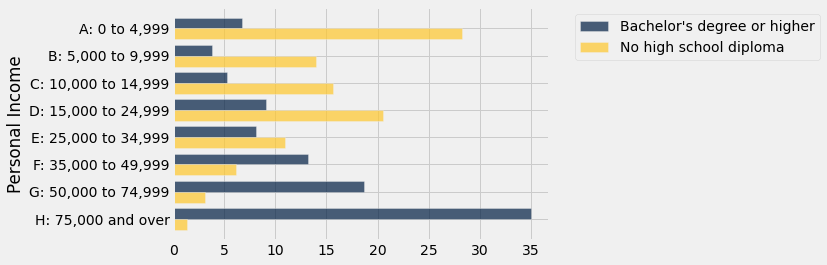

In [31]:
distributions.select(0, 1, 4).barh(0)
